# Consumer preference EDA
## Looking at preference distributions on some real datasets

### May 2020
### John Burt

### Datasets:

Downloaded from the [Sensometric Society Data Set Repository](http://www.sensometric.org/datasets)

**Brown bread:** 570 consumers each evaluated 6 brown breads on the 9-point hedonic scale in a 16-present-6 sensory-informed balanced incomplete block design. Missing data (denoted NA) appear by design.

**Fried mozarella cheese sticks**: 161 consumers evaluated 8 fried Mozarella cheese sticks for overall liking, as well as liking for appearance, flavor, and texture. There are some missing data. 

### Notebook purpose:

I'm developing a consumer preference simulator to generate datasets for A/B testing. I want to look at some real world distributions of consumer preferences so that I can try to imitate that in my simulator. 

### Results:

- All product score distributions are negatively skewed, especially when the peak is closer to the highest ratings value (9).


- Nearly all distributions are bimodal. This might be explained by:
    - Panelist subgroups with distinctly different preferences.
    - Panelist subgroups with distinctly different rating criteria.

### Conclusions: 

It looks like I can generate a reasonable facimile of a preference distribution using a normal distribution and by skewing the distribution based on where the mean lies in the rating range. 

I don't know how to interpret the bimodality. I could either ignore it, or add this as an option. I need to research why this showed up in two different datasets.

In [4]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
pd.options.display.max_columns = 100

import numpy as np
import seaborn as sns


# Brown bread preferences

In [65]:
# brown bread preferences
df_bb = pd.read_csv('./data/bbread.csv')
df_bb.columns.values[0] = 'Panelist'
prod_cols = df_bb.columns[1:]

print('# samples =',(~df_bb[prod_cols].isnull()).sum().sum())
print('# panelists =',len(df_bb['Panelist'].unique()))
print('# products =',len(prod_cols))
print('min rating =', df_bb[prod_cols].min().min())
print('max rating =', df_bb[prod_cols].max().max())

df_bb.head()


# samples = 3420
# panelists = 570
# products = 16
min rating = 1.0
max rating = 9.0


,Panelist,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16
0,1,8.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,NaN,NaN,NaN,NaN,9.0
1,2,8.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,7.0,NaN,7.0,NaN,5.0
2,3,NaN,NaN,7.0,NaN,7.0,NaN,6.0,8.0,NaN,NaN,NaN,8.0,NaN,NaN,7.0,NaN
3,4,NaN,9.0,NaN,NaN,NaN,9.0,6.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,8.0
4,5,7.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,8.0,8.0


## Product preference score distributions

### Results:

- All product score distributions are negatively skewed, especially when the peak is closer to the highest ratings value (9).


- All distributions are bimodal. This might be explained by:
    - Panelist subgroups with distinctly different preferences.
    - Panelist subgroups with distinctly different rating criteria.


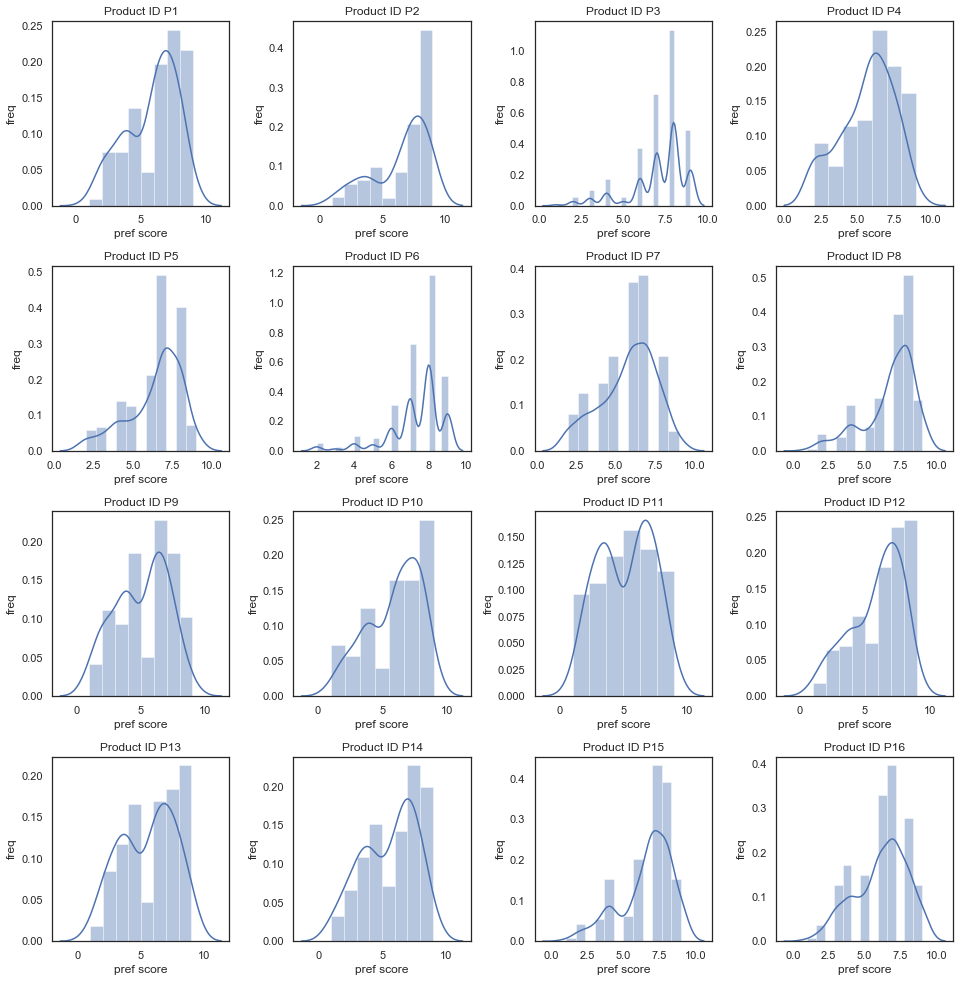

In [67]:
ncols = 4
nrows = 4

plt.figure(figsize=[15,15])

# for i, prod_id in zip(range(len(prod_ids)),prod_ids):
for i, (prod_id, scores) in zip(range(len(prod_cols)),
                                df_bb[prod_cols].iteritems()):
    ax = plt.subplot(nrows, ncols, i+1)
    sns.distplot(scores)
    plt.ylabel('freq')
    plt.xlabel('pref score')
    plt.title('Product ID %s'%(prod_id));
plt.tight_layout(rect=[0, 0, .90, 0.92]);


# Fried mozarella cheese stick preferences


In [55]:
# fried mozzarella chees sticks preferences
df_ch = pd.read_csv('./data/Fried_Mozarella_Cheese_Sticks.csv')

featnames = ['Overall','Appearance','Flavor','Texture']

print('# assessment categories =',', '.join(featnames))
print()
print('# samples =',df_ch.shape[0])
print('# panelists =',len(df_ch['Panelist'].unique()))
print('# products =',len(df_ch['Prod ID'].unique()))
print('min rating =', df_ch[featnames].min().min())
print('max rating =', df_ch[featnames].max().max())

df_ch.head()

# samples = 1284
# assessment categories = Overall, Appearance, Flavor, Texture
# panelists = 161
# products = 8
min rating = 1
max rating = 9


,Panelist,Prod ID,Overall,Appearance,Flavor,Texture
0,1,196,9,9,9,9
1,1,239,7,9,6,7
2,1,354,9,8,8,7
3,1,427,3,8,2,3
4,1,577,8,9,7,9


## Correlate assessment categories

### Results
- All assessment categories are correlated, but to different degrees.


- Overall is most correlated with Flavor, while Appearance is least correlated with any other category.

This suggests that the panelists are placing the most weight on Flavor when making an overall assessment. 

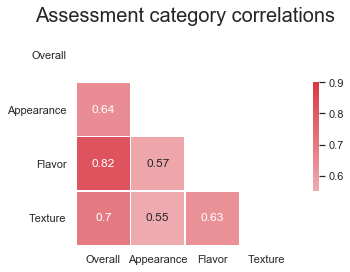

In [42]:
featnames = ['Overall','Appearance','Flavor','Texture']

# Generate a mask for the upper triangle
mask = np.zeros([len(featnames),len(featnames)], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, sep=100, as_cmap=True)

plt.figure(figsize=(7, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_ch[featnames].corr(), mask=mask, cmap=cmap, vmax=.9, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Assessment category correlations', fontsize=20);


## Product preference score distributions

### Results:

- All product score distributions are negatively skewed, especially when the peak is closer to the highest ratings value (9).


- All distributions are bimodal. This might be explained by:
    - Panelist subgroups with distinctly different preferences.
    - Panelist subgroups with distinctly different rating criteria.


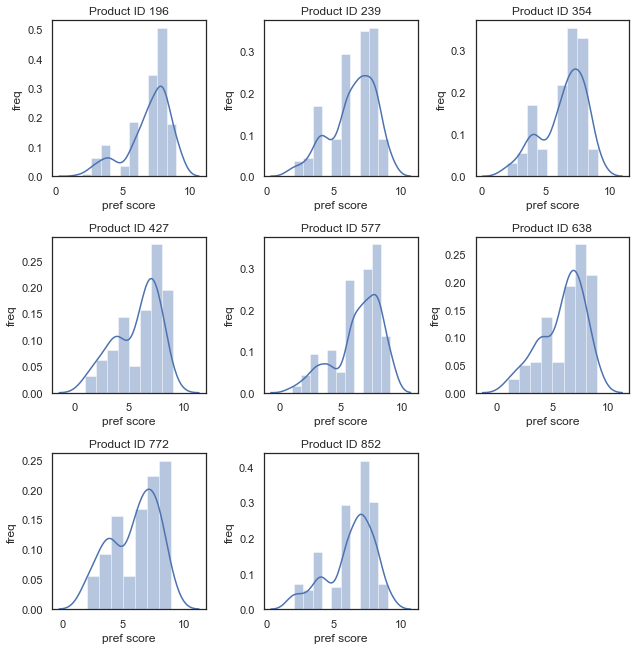

In [57]:
prod_ids = np.sort(df_ch['Prod ID'].unique())
featname = 'Overall'
# featname = 'Appearance'
# featname = 'Flavor'
ncols = 3
nrows = 3

plt.figure(figsize=[10,10])

for i, prod_id in zip(range(len(prod_ids)),prod_ids):
    ax = plt.subplot(nrows, ncols, i+1)
    sns.distplot(df_ch[featname][df_ch['Prod ID']==prod_id])
    plt.ylabel('freq')
    plt.xlabel('pref score')
    plt.title('Product ID %d'%(prod_id));
plt.tight_layout(rect=[0, 0, .90, 0.92]);
